<a href="https://colab.research.google.com/github/Phani-96/memory/blob/master/NLpAssgnmnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [48]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/housing.csv')
print("Here are the rows of the dataset:")
dataset = dataset.dropna()

dataset.head(10)

Here are the rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


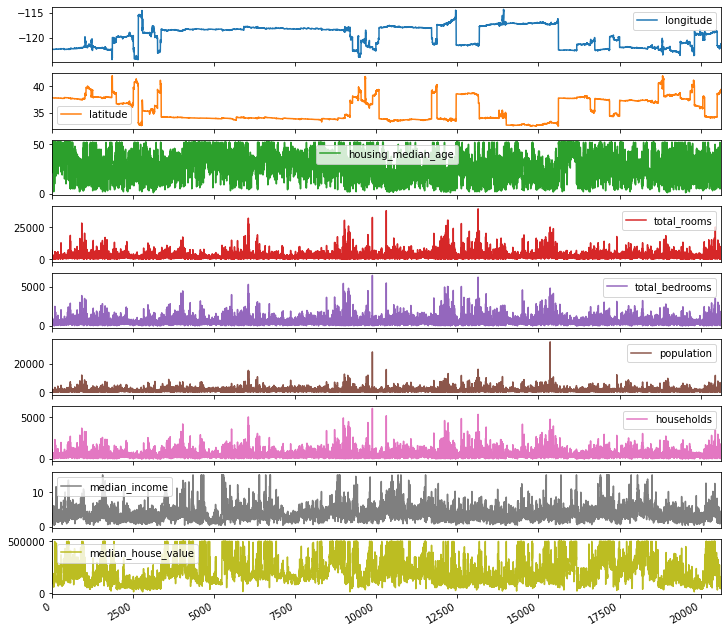

In [57]:
import matplotlib.pyplot as plt


dataset.plot(subplots= True,figsize=(12,12));


plt.legend(loc='best')

In [0]:
import torch 
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.utils.data import DataLoader,TensorDataset

In [0]:
class CnnRegressor(torch.nn.Module):

  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor,self).__init__()
    self.batch_size=batch_size
    self.inputs=inputs
    self.outputs=outputs
    self.input_layer=Conv1d(inputs,batch_size,1)
    self.max_pooling_layer=MaxPool1d(1)
    self.conv_layer=Conv1d(batch_size,128,1)
    self.flatten_layer=Flatten()
    self.linear_layer=Linear(128,64)
    self.output_layer=Linear(64,outputs)

  def feed(self,input):

    input=input.reshape((self.batch_size,self.inputs,1))

    output=relu(self.input_layer(input))

    output=self.max_pooling_layer(output)

    output=relu(self.conv_layer(output))
    
    output=self.flatten_layer(output)

    output=self.linear_layer(output)

    output=self.output_layer(output)
    return output

In [51]:
from torch.optim import SGD
from torch.nn import L1Loss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [0]:
X = dataset.loc[:,'longitude' : 'median_income']
Y = dataset['median_house_value']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2003)
x_train_np=x_train.to_numpy()
x_test_np=x_test.to_numpy()
y_train_np=y_train.to_numpy()
y_test_np=y_test.to_numpy()

In [53]:
batch_size=64
model = CnnRegressor(batch_size, X.shape[1],1)
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [0]:
def model_loss(model,dataset,train =False,optimizer =None):
  performance = L1Loss()
  score_metric =R2Score()

  avg_loss=0
  avg_score=0
  count=0
  for input,output in iter(dataset):

    predictions=model.feed(input)
    loss=performance(predictions,output)

    score_metric.update([predictions,output])
    score=score_metric.compute()

    if(train):
      optimizer.zero_grad()

      loss.backward()
      optimizer.step()

    avg_loss +=loss.item()
    avg_score +=score
    count += 1
  return avg_loss / count, avg_score / count

In [56]:
epochs=1245

optimizer=SGD(model.parameters(),lr=1e-5)

inputs=torch.from_numpy(x_train_np).cuda().float()
ouputs=torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()

tensor=TensorDataset(inputs,ouputs)
loader=DataLoader(tensor,batch_size,shuffle=True,drop_last=True)

for epoch in range(epochs):

  avg_loss,avg_r2_score=model_loss(model,loader,train=True,optimizer=optimizer)

  print("Epoch"+ str(epoch+1)+ ":\n\tLoss ="+ str(avg_loss)+ "\n\tR^2 Score=" + str (avg_r2_score))

Epoch1:
	Loss =68520.78061939462
	R^2 Score=0.38248971542406823
Epoch2:
	Loss =68119.69634599215
	R^2 Score=0.39956421132037195
Epoch3:
	Loss =68692.05747267377
	R^2 Score=0.3829123410593601
Epoch4:
	Loss =68556.95091788117
	R^2 Score=0.3822872044155494
Epoch5:
	Loss =68615.89080016816
	R^2 Score=0.4015064477437218
Epoch6:
	Loss =68932.09296174327
	R^2 Score=0.36850220558272156
Epoch7:
	Loss =68767.49987738229
	R^2 Score=0.36292090738168725
Epoch8:
	Loss =68505.00381866592
	R^2 Score=0.36589919162173556
Epoch9:
	Loss =68621.26720151346
	R^2 Score=0.38977772389392523
Epoch10:
	Loss =68515.37137401906
	R^2 Score=0.37553289184257005
Epoch11:
	Loss =68063.82372827915
	R^2 Score=0.3728168655905583
Epoch12:
	Loss =68029.40250140135
	R^2 Score=0.38951540562019393
Epoch13:
	Loss =68658.87140905269
	R^2 Score=0.3720971006332996
Epoch14:
	Loss =69006.68846342489
	R^2 Score=0.35905364861865235
Epoch15:
	Loss =68951.2167881166
	R^2 Score=0.3783534688742628
Epoch16:
	Loss =67816.22349705717
	R^2 Sc